In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime, time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
CocaCola = pd.read_csv('D:/ExcelRassignments/Assignment18/CocaCola_Sales_Rawdata.csv', header=0, index_col='Quarter', parse_dates=True)
CocaCola.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


## EDA

In [3]:
cc_df = CocaCola.copy()
cc_df.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [4]:
cc_df.index.freq='QS'
cc_df.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-JAN')

In [5]:
cc_df.shape

(42, 1)

In [6]:
cc_df[cc_df.duplicated()].shape

(0, 1)

In [7]:
cc_df.dtypes

Sales    float64
dtype: object

In [8]:
cc_df.isna().sum()

Sales    0
dtype: int64

In [9]:
cc_df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


## Run ETS Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

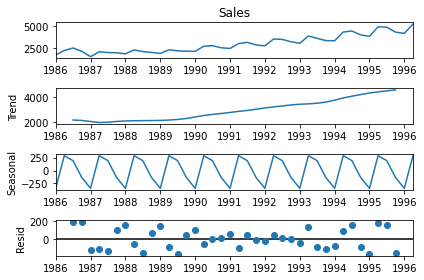

In [11]:
results = seasonal_decompose(cc_df['Sales'], model='addittive')
est_plot = results.plot()

## Transformation

<AxesSubplot:xlabel='Quarter'>

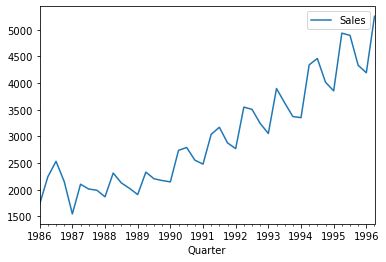

In [12]:
cc_df.plot()

In [13]:
dataframe = pd.DataFrame(cc_df.values)
dataframe.columns=['Sales']
dataframe['Sales']=np.sqrt(dataframe['Sales'])

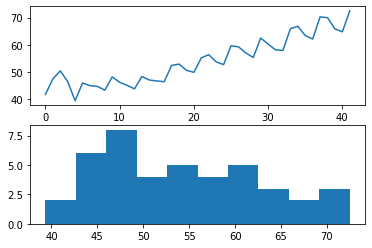

In [14]:
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])

pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

## Creating Dummy Variables

In [17]:
dummy_df = pd.read_csv('D:/ExcelRassignments/Assignment18/CocaCola_Sales_Rawdata.csv')
dummy_df.head()

,Quarter,Sales
0,1986Q1,1734.827000
1,1986Q2,2244.960999
2,1986Q3,2533.804993
3,1986Q4,2154.962997
4,1987Q1,1547.818996


In [18]:
Quarter=['Q1','Q2','Q3','Q4']
n=dummy_df['Quarter'][0]
n[4:]
dummy_df['quarter']=0
for i in range(42):
    n=dummy_df['Quarter'][i]
    dummy_df['quarter'][i]=n[4:]
dummy=pd.DataFrame(pd.get_dummies(dummy_df['quarter']))
cc=pd.concat((dummy_df, dummy), axis=1)
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,1986Q1,1734.827000,Q1,1,0,0,0
1,1986Q2,2244.960999,Q2,0,1,0,0
2,1986Q3,2533.804993,Q3,0,0,1,0
3,1986Q4,2154.962997,Q4,0,0,0,1
4,1987Q1,1547.818996,Q1,1,0,0,0


## Creating t, t_square and log values

In [24]:
t = np.arange(1, 43)
cc['t']=t
cc['t_square']=cc['t']*cc['t']
log_Sales = np.log(cc['Sales'])
cc['log_Sales']=log_Sales
cc_sales = cc[['Quarter', 'Sales','t', 't_square', 'log_Sales', 'Q1', 'Q2', 'Q3', 'Q4', 'quarter']]
cc_sales.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1


In [25]:
cc_sales['Date'] = pd.to_datetime(cc_sales.Quarter)
cc_sales['year'] = cc_sales.Date.dt.strftime('%Y') 
cc_sales.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter,Date,year
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1,1986-01-01,1986
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2,1986-04-01,1986
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3,1986-07-01,1986
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4,1986-10-01,1986
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1,1987-01-01,1987


## Time Series Decomposition

## Splitting Data

In [26]:
train = cc_sales.head(38)
test = cc_sales.tail(4)

## Linear Model

In [27]:
import statsmodels.formula.api as smf

In [28]:
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295748553

In [29]:
# Exponential

Exp=smf.ols('log_Sales~t', data=train).fit()
pred_Exp =pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.2479731321014

In [30]:
# Quadratic

Quad=smf.ols('Sales~t+t_square', data=train).fit()
pred_Quad=pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.5618351982128

In [32]:
# Additive Seasonality

add_sea=smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154374435

In [33]:
# Additive & Quadratic

add_sea_Quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=train).fit()
pred_add_sea_Quad=pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_square']]))
rmse_add_sea_Quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

301.73800721457127

In [34]:
# Multiplicative Seasonality

mul_sea=smf.ols('log_Sales~Q1+Q2+Q3', data=train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test))
rmse_mult_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mult_sea

1963.3896400563272

In [35]:
# Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439056162416

### Compare Results

In [36]:
data={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_Quad","rmse_mult_sea","rmse_Mult_add_sea"]),"RMSE":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE"])

,MODEL,RMSE
6,rmse_Mult_add_sea,225.524391
4,rmse_add_sea_Quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_mult_sea,1963.389640


## Observation
### I have crated 4 dummy variablesand as per above RMSE values, I have selected Multiplicative Additive Seasonality model for my forecasting algorithm.

## Predict new time

In [37]:
predict_data=cc_sales.copy()
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter,Date,year
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1,1986-01-01,1986
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2,1986-04-01,1986
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3,1986-07-01,1986
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4,1986-10-01,1986
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1,1987-01-01,1987


In [38]:
predict_data=predict_data.drop('quarter',axis=1)
predict_data=predict_data.drop('Date',axis=1)
predict_data=predict_data.drop('year',axis=1)

In [39]:
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0


## Build the model

In [40]:
model_full = smf.ols('log_Sales~t+Q1+Q2+Q3', data=cc_sales).fit()

In [41]:
pred_new = pd.Series(Mul_Add_sea.predict(predict_data))
predict_data['Forecared_Sales']=pd.Series(pred_new)
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,Forecared_Sales
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,7.345823
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,7.587884
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,7.574280
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,7.498859
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,7.440236


## Naive Method

In [42]:
naive = CocaCola.copy()
naive.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [43]:
train_naive = naive.iloc[:38]
test_naive = naive.iloc[38:]

In [44]:
naive_train=np.asarray(train_naive.Sales)
lastvalue= naive_train[len(naive_train)-1]
y_hat=test_naive.copy()
y_hat['naive_forecast']=lastvalue
y_hat

,Sales,naive_forecast
Quarter,,
1995-07-01,4895.0,4936.0
1995-10-01,4333.0,4936.0
1996-01-01,4194.0,4936.0
1996-04-01,5253.0,4936.0


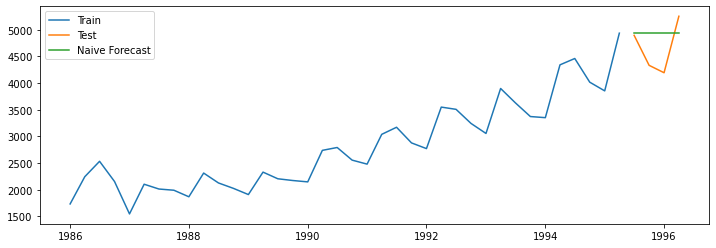

In [45]:
plt.figure(figsize=(12,4))
plt.plot(train_naive['Sales'], label='Train')
plt.plot(test_naive['Sales'], label='Test')
plt.plot(y_hat['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

## Evaluate Model

In [46]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

In [47]:
mse_naive = mean_squared_error(test_naive.Sales, y_hat.naive_forecast)
mse_naive

254085.75

In [48]:
rmse_naive = rmse(test_naive.Sales, y_hat.naive_forecast)
rmse_naive

504.0691916790789

In [49]:
Naive = {"MODEL":pd.Series(['Naive Mehtod']), 'RMSE':pd.Series([rmse_naive]), "MSE":pd.Series([mse_naive])}
Naive=pd.DataFrame(Naive)
Naive

,MODEL,RMSE,MSE
0,Naive Mehtod,504.069192,254085.75


## Observation
### 1) All the values are same as we assigned all the forecast recodes to the last value of the tain set.
### 2) The Forecasting is undervalued when compared to the actual test data value.

## Moving Average

In [50]:
CC_MA = CocaCola.copy()
CC_MA.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [51]:
# Simple Moving Average

In [52]:
CC_MA['6-month-SMA']=CC_MA['Sales'].rolling(window=6).mean()
CC_MA['12-month-SMA']= CC_MA['Sales'].rolling(window=12).mean()

In [53]:
CC_MA.head(12)

,Sales,6-month-SMA,12-month-SMA
Quarter,,,
1986-01-01,1734.827000,NaN,NaN
1986-04-01,2244.960999,NaN,NaN
1986-07-01,2533.804993,NaN,NaN
1986-10-01,2154.962997,NaN,NaN
1987-01-01,1547.818996,NaN,NaN
1987-04-01,2104.411995,2053.464497,NaN
1987-07-01,2014.362999,2100.053830,NaN
1987-10-01,1991.746998,2057.851496,NaN
1988-01-01,1869.049999,1947.058997,NaN


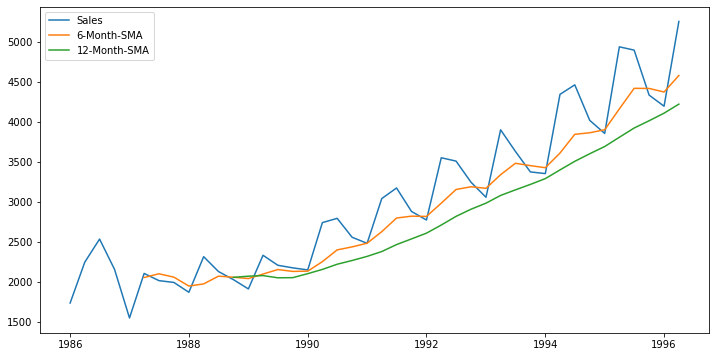

In [54]:
plt.figure(figsize=(12,6))
plt.plot(CC_MA['Sales'], label= 'Sales')
plt.plot(CC_MA['6-month-SMA'], label='6-Month-SMA')
plt.plot(CC_MA['12-month-SMA'], label='12-Month-SMA')
plt.legend(loc='best')
plt.show()

In [55]:
y_hat_ma = CC_MA.copy()

In [56]:
train_len= 38

In [64]:
train_ma= CC_MA['Sales'].head(38)
test_ma= CC_MA['Sales'].tail(4)

In [58]:
ma_window=12

In [65]:
y_hat_ma['SMA_forecast']= y_hat_ma['Sales'].rolling(ma_window).mean()

In [66]:
train_ma1=train_ma[len(train_ma)-1]

In [67]:
y_hat_ma.head()

,Sales,6-month-SMA,12-month-SMA,SMA_forecast
Quarter,,,,
1986-01-01,1734.827000,NaN,NaN,NaN
1986-04-01,2244.960999,NaN,NaN,NaN
1986-07-01,2533.804993,NaN,NaN,NaN
1986-10-01,2154.962997,NaN,NaN,NaN
1987-01-01,1547.818996,NaN,NaN,NaN


## Exponentially Weighted MA

In [71]:
EWMA = cc_df.copy()
EWMA.head()

,Sales
Quarter,
1986-01-01,41.651254
1986-04-01,47.381019
1986-07-01,50.336915
1986-10-01,46.421579
1987-01-01,39.342331


In [72]:
span=12
alpha = 2/(span+1)

In [73]:
EWMA['EWMA12']=cc_df['Sales'].ewm(span=12, adjust=False).mean().dropna()

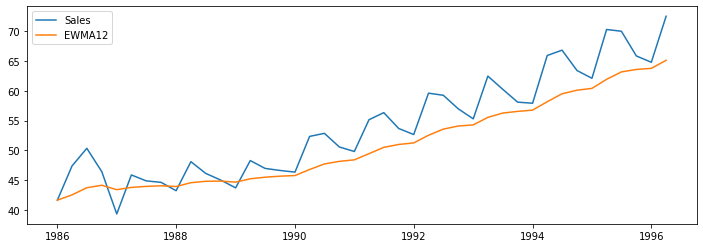

In [74]:
plt.figure(figsize=(12,4))
plt.plot(EWMA['Sales'],label='Sales')
plt.plot(EWMA['EWMA12'], label='EWMA12')
plt.legend(loc='best')
plt.show()

In [75]:
y_hat_ewma=CC_MA.copy()

In [76]:
train_ewma=CC_MA['Sales'].head(38)
test_ewma=CC_MA['Sales'].tail(4)

In [77]:
ewma=train_ewma[len(train_ewma)-1]

In [78]:
y_hat_ewma['EWMA_Forecast']=ewma

In [79]:
mse_ewma=mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:]).round(2)
mse_ewma

254085.75

In [80]:
rmse_ewma = np.sqrt(mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:])).round(2)
rmse_ewma

504.07

In [81]:
EWMA={"MODEL":pd.Series(["Exponentially Weighted Moving Average"]),"RMSE":pd.Series([rmse_ewma]),"MSE":pd.Series([mse_ewma])}
EWMA=pd.DataFrame(EWMA)
EWMA

,MODEL,RMSE,MSE
0,Exponentially Weighted Moving Average,504.07,254085.75


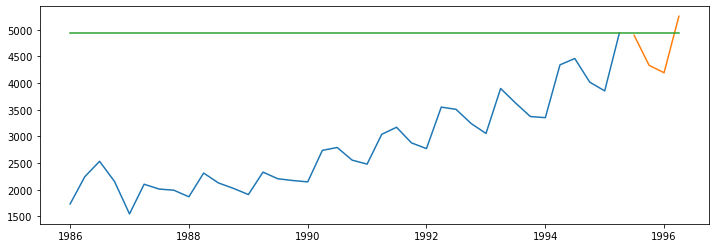

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train_ewma, label='Train')
plt.plot(test_ewma, label='Test')
plt.plot(y_hat_ewma['EWMA_Forecast'], label='EWMA_Forecast')
plt.show()

## Exponential Smoothing Techniques
### 1) Single Exponentail Smoothing (SES-Level)
### 2) Double Exponetail Smoothing (Holt's Method-Level+Trend)
### 3) Holt Winter Method (Level+Trend+Seasonality)

In [83]:
CC_EST=cc_df.copy()
CC_EST.head()

,Sales
Quarter,
1986-01-01,41.651254
1986-04-01,47.381019
1986-07-01,50.336915
1986-10-01,46.421579
1987-01-01,39.342331


In [84]:
# 1) SES

CC_SES=CC_EST.copy()

In [85]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

In [86]:
model_ses12=SimpleExpSmoothing(CC_SES['Sales'])
fitted_model=model_ses12.fit(smoothing_level=alpha, optimized=False)
CC_EST['SES12']=fitted_model.fittedvalues.shift(-1)
CC_EST.head()

,Sales,SES12
Quarter,,
1986-01-01,41.651254,41.651254
1986-04-01,47.381019,42.532757
1986-07-01,50.336915,43.733396
1986-10-01,46.421579,44.146963
1987-01-01,39.342331,43.407789


In [87]:
train_ses=CC_MA.head(38)
test_ses=CC_MA.tail(4)

In [88]:
ses_model= SimpleExpSmoothing(train_ses['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start = test_ses.index[0], end=test_ses.index[-1])

In [89]:
mse_ses=mean_squared_error(test_ses.Sales, pred_ses)
mse_ses.round()

602922.0

In [90]:
rmse_ses=np.sqrt(mean_squared_error(test_ses.Sales, pred_ses)).round(2)
rmse_ses

776.48

In [91]:
SES={"MODEL":pd.Series(["Single Exponeatail Smoothing"]),"RMSE":pd.Series([rmse_ses]),"MSE":pd.Series([mse_ses])}
SES=pd.DataFrame(SES)
SES.round(2)

,MODEL,RMSE,MSE
0,Single Exponeatail Smoothing,776.48,602921.86


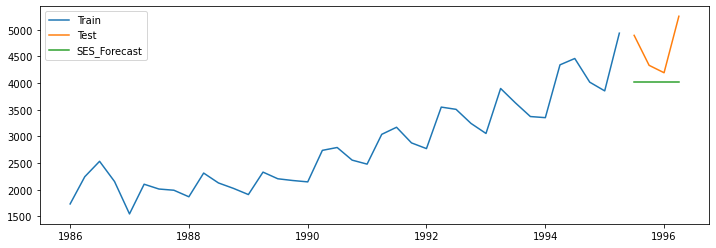

In [92]:
plt.figure(figsize=(12,4))
plt.plot(train_ses['Sales'], label='Train')
plt.plot(test_ses['Sales'], label='Test')
plt.plot(pred_ses, label='SES_Forecast')
plt.legend(loc='best')
plt.show()

In [93]:
# 2) DES

CC_DES=CC_EST.copy()
CC_DES.head()

,Sales,SES12
Quarter,,
1986-01-01,41.651254,41.651254
1986-04-01,47.381019,42.532757
1986-07-01,50.336915,43.733396
1986-10-01,46.421579,44.146963
1987-01-01,39.342331,43.407789


In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_add12=ExponentialSmoothing(CC_DES['Sales'], trend='add')
fitted_model=model_add12.fit()
CC_EST['DESadd12']=fitted_model.fittedvalues.shift(-1)
CC_EST.head()

,Sales,SES12,DESadd12
Quarter,,,
1986-01-01,41.651254,41.651254,43.478396
1986-04-01,47.381019,42.532757,44.297290
1986-07-01,50.336915,43.733396,45.743993
1986-10-01,46.421579,44.146963,46.192058
1987-01-01,39.342331,43.407789,44.954097


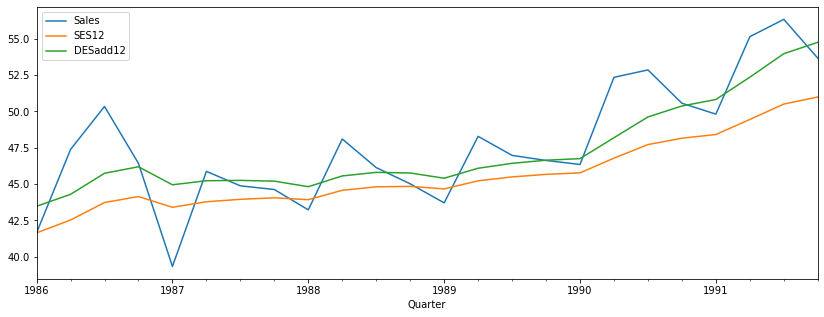

In [95]:
CC_EST[['Sales','SES12','DESadd12']].iloc[:24].plot(figsize=(14,5)).autoscale(axis='x', tight=True)

In [97]:
train_des=CocaCola.copy().head(38)
test_des=CocaCola.copy().tail(4)

In [98]:
model_des = ExponentialSmoothing(train_des["Sales"]).fit()
pred_des = model_des.predict(start = test_des.index[0],end = test_des.index[-1])

In [99]:
mse_des=mean_squared_error(test_des, pred_des)
mse_des.round(2)

213972.24

In [100]:
rmse_des= np.sqrt(mean_squared_error(test_des, pred_des)).round(2)
rmse_des

462.57

In [101]:
DES={"MODEL":pd.Series(["Double Exponential Smoothing"]),"RMSE":pd.Series([rmse_des]),"MSE":pd.Series([mse_des])}
DES=pd.DataFrame(DES)
DES.round(2)

,MODEL,RMSE,MSE
0,Double Exponential Smoothing,462.57,213972.24


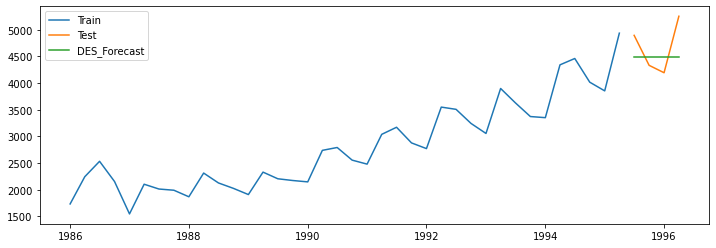

In [102]:
plt.figure(figsize=(12,4))
plt.plot(train_des, label="Train")
plt.plot(test_des, label="Test")
plt.plot(pred_des, label="DES_Forecast")
plt.legend(loc='best')
plt.show()

In [103]:
# 3) TES

CC_EST['TESadd12']=ExponentialSmoothing(CC_EST['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
CC_EST.head()

,Sales,SES12,DESadd12,TESadd12
Quarter,,,,
1986-01-01,41.651254,41.651254,43.478396,41.651228
1986-04-01,47.381019,42.532757,44.297290,48.003625
1986-07-01,50.336915,43.733396,45.743993,47.631477
1986-10-01,46.421579,44.146963,46.192058,47.668028
1987-01-01,39.342331,43.407789,44.954097,43.898101


In [104]:
CC_EST['TESmul12']=ExponentialSmoothing(CC_EST['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
CC_EST.head()

,Sales,SES12,DESadd12,TESadd12,TESmul12
Quarter,,,,,
1986-01-01,41.651254,41.651254,43.478396,41.651228,41.826183
1986-04-01,47.381019,42.532757,44.297290,48.003625,47.002380
1986-07-01,50.336915,43.733396,45.743993,47.631477,47.443599
1986-10-01,46.421579,44.146963,46.192058,47.668028,47.397861
1987-01-01,39.342331,43.407789,44.954097,43.898101,44.615258


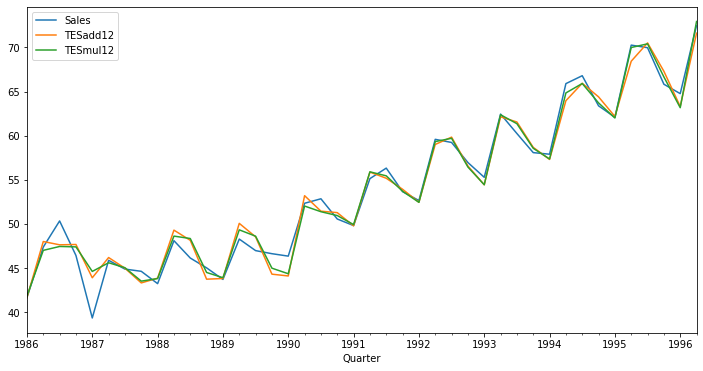

In [105]:
CC_EST[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

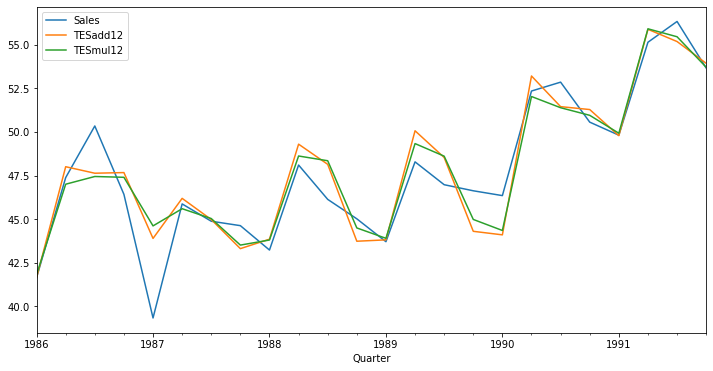

In [106]:
CC_EST[['Sales','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

In [107]:
hwm=CC_DES.copy()

In [109]:
train_hwm=CocaCola.head(38)
test_hwm=CocaCola.tail(4)

In [110]:
hwm_model_add = ExponentialSmoothing(train_hwm["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwm_add = hwm_model_add.predict(start = test_hwm.index[0],end = test_hwm.index[-1])

In [111]:
mse_hwm_add=mean_squared_error(test_hwm, pred_hwm_add)
mse_hwm_add.round(2)

39920.42

In [112]:
rmse_hwm_add = np.sqrt(mean_squared_error(test_hwm.Sales, pred_hwm_add)).round(2)
rmse_hwm_add

199.8

In [113]:
hwm_model_mul=ExponentialSmoothing(train_hwm['Sales'],seasonal="mul",trend="add", seasonal_periods=12).fit()
pred_hwm_mul=hwm_model_mul.predict(start =test_hwm.index[0],end=test_hwm.index[-1])

In [114]:
mse_hwm_mul=mean_squared_error(test_hwm, pred_hwm_mul)
mse_hwm_mul.round(2)

19640.89

In [115]:
rmse_hwm_mul=np.sqrt(mean_squared_error(test_hwm.Sales, pred_hwm_mul)).round(2)
rmse_hwm_mul

140.15

In [116]:
HWM_Additive={"MODEL":pd.Series(["Holt Winters Method_Additive"]),"RMSE":pd.Series([rmse_hwm_add]),"MSE":pd.Series([mse_hwm_add])}
HWM_Additive=pd.DataFrame(HWM_Additive)
HWM_Additive.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Additive,199.8,39920.42


In [117]:
HWM_Multiplicative={"MODEL":pd.Series(["Holt Winters Method_Multiplicative"]),"RMSE":pd.Series([rmse_hwm_mul]),"MSE":pd.Series([mse_hwm_mul])}
HWM_Multiplicative=pd.DataFrame(HWM_Multiplicative)
HWM_Multiplicative.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Multiplicative,140.15,19640.89


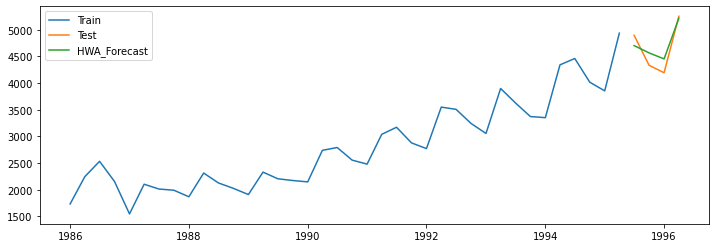

In [118]:
plt.figure(figsize=(12,4))
plt.plot(train_hwm, label='Train')
plt.plot(test_hwm, label='Test')
plt.plot(pred_hwm_add, label='HWA_Forecast')
plt.legend(loc='best')
plt.show()

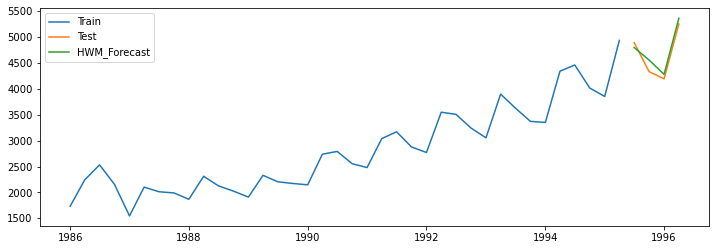

In [119]:
plt.figure(figsize=(12,4))
plt.plot(train_hwm, label='Train')
plt.plot(test_hwm, label='Test')
plt.plot(pred_hwm_mul, label='HWM_Forecast')
plt.legend(loc='best')
plt.show()

## ARMA Model
### AR Model
#### Stationary vs Non-Stationary Time Series

In [120]:
AR_df=cc_df.copy()
AR_df.head()

,Sales
Quarter,
1986-01-01,41.651254
1986-04-01,47.381019
1986-07-01,50.336915
1986-10-01,46.421579
1987-01-01,39.342331


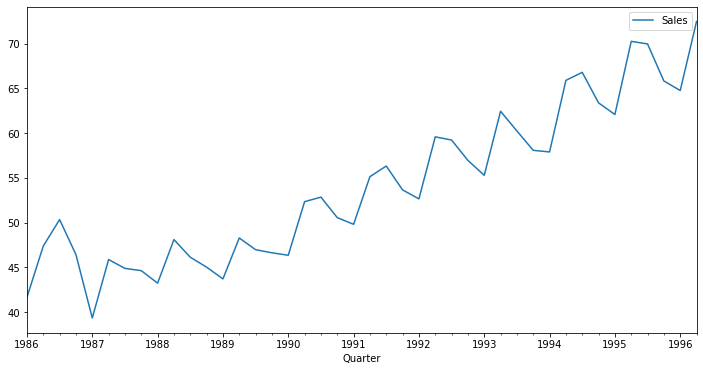

In [121]:
# 1) Visual Check

AR_df.plot(figsize=(12,6))
plt.show()

## Observation
#### Trend and Variance is not constant
## 2) Augmented Dickey Fuller Test(Checking Seasonality)¶
### Null Hypothesis (H0): The series is not stationary p-val>0.05
### Alternate Hypothesis (H1): The series is stationary p-val<0.05
### Stationary check Method
#### Duckey Fuller Method

In [122]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [123]:
from statsmodels.tsa.stattools import adfuller

#Ho=It is not stationary
#H1=It is stationary
def adf_test(AR_df):    
    result = adfuller(AR_df.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [124]:
adf_test(AR_df['Sales'])

Fail to reject the null hypothesis
Data is non-stationary


In [125]:
adf_test=adfuller(AR_df['Sales'])
adf_test

(0.8285941170578776,
 0.9920839872020732,
 6,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 97.97404668347761)

### P-value(0.996)>critical value(0.05)
### Failed to reject null hypothesis (Series is not Stationary)
### Hence, the time series is Non Stationary.

## Converting Non-Stationary to Stattionary Time Series Methods
### 1)Rollling Statistics
### 2)Transformation Method
### 3)Differencing Method

In [126]:
AR_df.head()

,Sales
Quarter,
1986-01-01,41.651254
1986-04-01,47.381019
1986-07-01,50.336915
1986-10-01,46.421579
1987-01-01,39.342331


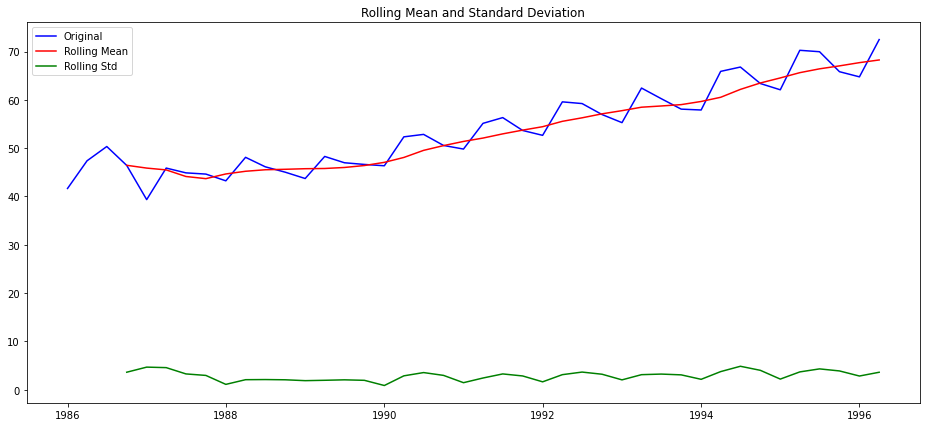

In [127]:
# Method 1

rollmean=AR_df.rolling(4).mean()
rollstd=AR_df.rolling(4).std()
plt.figure(figsize=(16, 7))
fig =plt.figure(1)

orig= plt.plot(AR_df, color='blue', label='Original')
mean=plt.plot(rollmean, color='red', label='Rolling Mean')
std=plt.plot(rollstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

## Observation
#### Rolling std is constant but rolling mean is not constant, it is still data is Non-Stationary
### Method 2
### Log Types
 #### 1) Adj_log
 #### 2) Adj_sqrt
 #### 3) Adj_cbrt

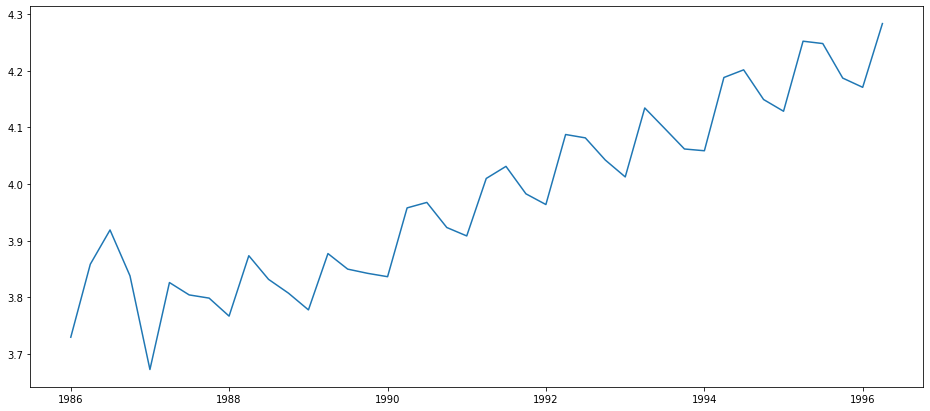

In [128]:
ts_log=np.log(AR_df)

plt.figure(figsize=(16,7))
fig=plt.figure(1)
plt.plot(ts_log)

#### Still data is not stationary , now we will check decompose seasonal

## Decomposition

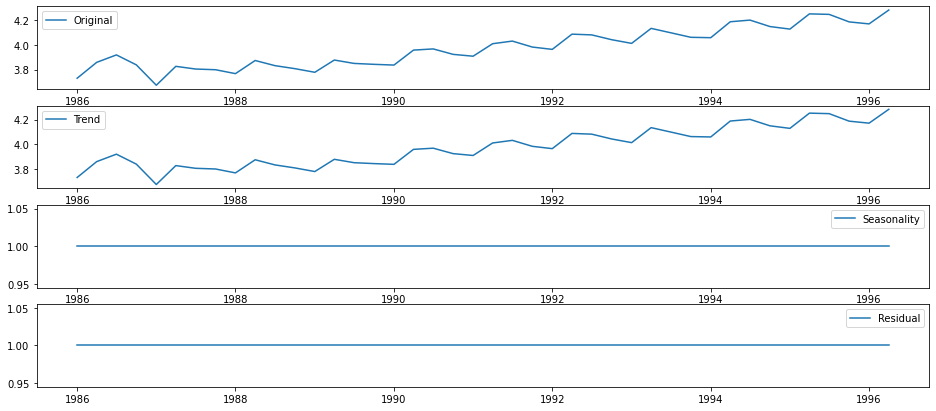

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition= seasonal_decompose(ts_log, freq=1, model='multiplicative')

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.figure(figsize=(16,7))
fig= plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

### Method 3

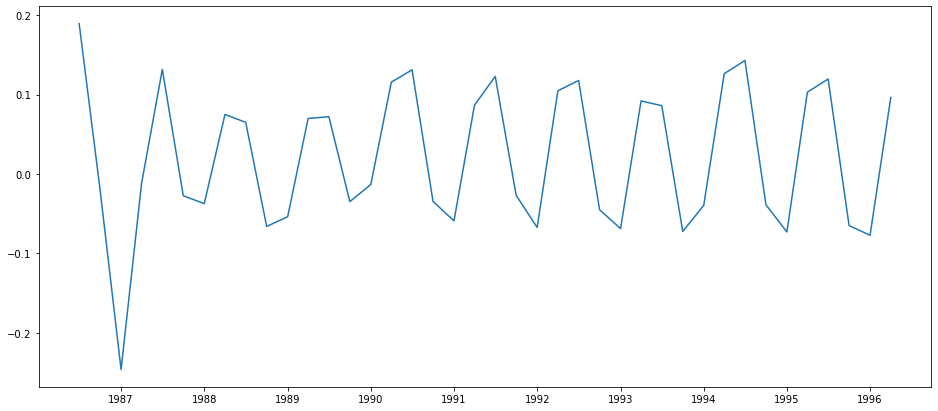

In [131]:
# y(t) =y(t)-y(t-1)

ts_log_diff=ts_log - ts_log.shift(2)

ts_log_diff1=ts_log_diff.dropna()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.plot(ts_log_diff1)
ts_test=ts_log_diff1.set_index

In [132]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    label=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, label):
        print(label+': '+str(value))
    if result[1] <=0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is  non-stationary")

In [133]:
adfuller_test(ts_log_diff1)

ADF Test Statistic: -4.783237394172348
p-value: 5.854705320346827e-05
#Lags Used: 4
Number of Observations Used: 35
Reject the null hypothesis
Data is stationary


## Observation-
#### I have used different methods for converting not Stationary to Stationary data,like Rolling Statistics, Differencing Method and Transformation Method, finally I have got stationary data after using Differencing method.
#### 1)We can see that there is no trend (upward or downward) above grap.
#### 2)It is a horizontal trend.
#### 3)The Mean and Variance is constant.

## LLR

In [134]:
def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR, DF).round(3)
    return p

In [135]:
# ACF and PACF
import statsmodels.graphics.tsaplots as sgt

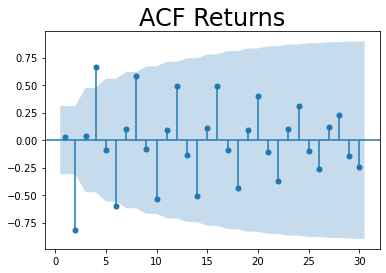

In [136]:
# ACF
sgt.plot_acf(ts_log_diff1, lags=30, zero=False,)
plt.title("ACF Returns", size=24)
plt.show()

In [137]:
# Observation-
# 1)The shaded portion is the significant.
# 2)With lag 4, the series is just correlated with itself. Hence, correlation=0.74 at lag=4.
# 3)ACF captures both direct and indirect correlation with the lag time.

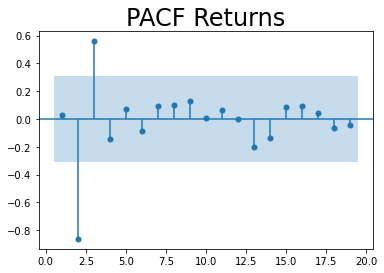

In [138]:
# PACF

sgt.plot_pacf(ts_log_diff1, lags=19, zero = False, method=('ols'))
plt.title("PACF Returns", size=24)
plt.show()

In [139]:
# Observation-
# 1)The shaded portion is the significant.
# 2)With lag 3, the series is just correlated with itself. Hence, correlation=0.5 at lag=3.
# 3)PACF captures direct correlation with the lag time.

### AR for Returns 

In [140]:
from statsmodels.tsa.arima_model import ARMA

In [141]:
# AR lag
model_ar1=ARMA(ts_log_diff1, order=(1,0))
results_ar1=model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                  39.114
Method:                       css-mle   S.D. of innovations              0.091
Date:                Wed, 30 Jun 2021   AIC                            -72.228
Time:                        13:31:54   BIC                            -67.161
Sample:                    07-01-1986   HQIC                           -70.396
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0218      0.015      1.471      0.141      -0.007       0.051
ar.L1.Sales     0.0287      0.165      0.174      0.862      -0.294       0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           34.7936           +0.0000j           34.7936            0.0000
-----------------------------------------------------------------------------
"""

In [142]:
# AR lag2
model_ar2=ARMA(ts_log_diff1, order=(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(2, 0)   Log Likelihood                  68.015
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 30 Jun 2021   AIC                           -128.030
Time:                        13:32:16   BIC                           -121.274
Sample:                    07-01-1986   HQIC                          -125.587
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0207      0.004      5.410      0.000       0.013       0.028
ar.L1.Sales     0.0978      0.078      1.254      0.210      -0.055       0.251
ar.L2.Sales    -0.8982      0.063    -14.215      0.000      -1.022      -0.774
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0544           -1.0538j            1.0552           -0.2418
AR.2            0.0544           +1.0538j            1.0552            0.2418
-----------------------------------------------------------------------------
"""

In [143]:
LLR_test(model_ar1, model_ar2)

0.0

In [144]:
model_ar3=ARMA(ts_log_diff1, order=(3,0))
results_ar3=model_ar3.fit()
print(results_ar3.summary())
print("LLR_test:"+str(LLR_test(model_ar2, model_ar3)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(3, 0)   Log Likelihood                  78.085
Method:                       css-mle   S.D. of innovations              0.032
Date:                Wed, 30 Jun 2021   AIC                           -146.170
Time:                        13:32:30   BIC                           -137.726
Sample:                    07-01-1986   HQIC                          -143.117
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0171      0.009      1.928      0.054      -0.000       0.035
ar.L1.Sales     0.6713      0.122      5.518      0.000       0.433       0.910
ar.L2.Sales    -0.9339      0.044    -21.154    

In [145]:
model_ar4=ARMA(ts_log_diff1, order=(4,0))
result_ar4=model_ar4.fit()
print(result_ar4.summary())
print("LLR test:" + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(4, 0)   Log Likelihood                  78.649
Method:                       css-mle   S.D. of innovations              0.032
Date:                Wed, 30 Jun 2021   AIC                           -145.299
Time:                        13:32:41   BIC                           -135.166
Sample:                    07-01-1986   HQIC                          -141.635
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0183      0.007      2.498      0.012       0.004       0.033
ar.L1.Sales     0.7823      0.159      4.927      0.000       0.471       1.093
ar.L2.Sales    -1.0989      0.160     -6.887    

In [146]:
# Observation
# P values very high moving to Model 3 to Model 4, there is no model improvments.
# Model 3 is good values for P.

## Analysing the Residuals

In [147]:
ts_log_diff1['res_ret']=results_ar3.resid

In [148]:
ts_log_diff1.res_ret.mean()

0.004649379063083509

In [149]:
ts_log_diff1.res_ret.std()

0.043638377057775776

In [150]:
sts.adfuller(ts_log_diff1.res_ret)

(-7.791722502185622,
 7.909334852684656e-12,
 0,
 39,
 {'1%': -3.610399601308181,
  '5%': -2.939108945868946,
  '10%': -2.6080629651545038},
 -143.26654759615099)

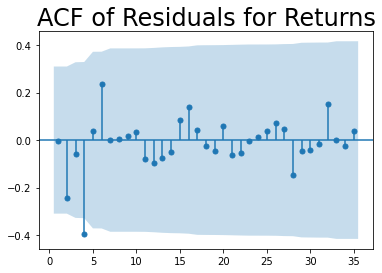

In [151]:
# ACF of Residuals for Returns
sgt.plot_acf(ts_log_diff1.res_ret, zero=False, lags=35)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

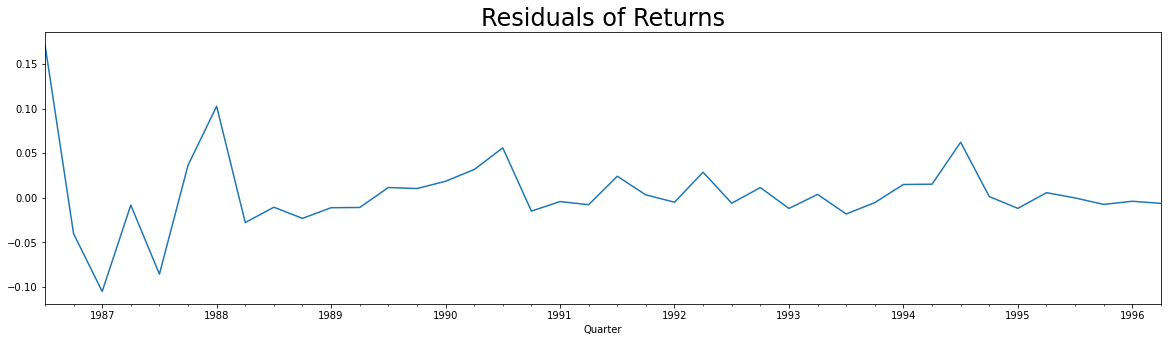

In [152]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### Building the AR Model

In [157]:
from statsmodels.tsa.arima_model import ARIMA

In [153]:
len(ts_log_diff1)

40

In [154]:
train_len=36

In [155]:
train_AR=ts_log_diff1.iloc[:36]
test_AR=ts_log_diff1.iloc[36:]

In [158]:
model =ARIMA(train_AR['Sales'], order=(2,0,0))

results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(2, 0)   Log Likelihood                  59.315
Method:                       css-mle   S.D. of innovations              0.045
Date:                Wed, 30 Jun 2021   AIC                           -110.631
Time:                        13:35:52   BIC                           -104.297
Sample:                    07-01-1986   HQIC                          -108.420
                         - 04-01-1995                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0208      0.004      4.849      0.000       0.012       0.029
ar.L1.Sales     0.1058      0.087      1.213      0.225      -0.065       0.277
ar.L2.Sales    -0.8869      0.071    -12.573      0.000      -1.025      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0596           -1.0601j            1.0618           -0.2411
AR.2            0.0596           +1.0601j            1.0618            0.2411
-----------------------------------------------------------------------------
"""

In [159]:
model_fit =model.fit()
model_fit.params

const          0.020845
ar.L1.Sales    0.105770
ar.L2.Sales   -0.886948
dtype: float64

In [160]:
# Observation
# constant=0.041691
# Coefficient=-0.886947
# The AR model has only one lag or p=6. Hence, we can represent the model as AR(2)

### Use Model to Predict AR Model

In [161]:
start=len(train_AR)
end=len(ts_log_diff1)-1
predictions_ar=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_ar=predictions_ar.rename('ARIMA(2,0,0) Predictions')

In [162]:
for i in range (len(predictions_ar)):
    print(f"predicted={predictions_ar[i]:<11.10}, expected={test_AR['Sales'][i]}")

predicted=0.1128878714, expected=0.11955135299514996
predicted=-0.04229486828, expected=-0.0651475719226573
predicted=-0.0674696752, expected=-0.07727967175137351
predicted=0.06750654224, expected=0.09626959960702663


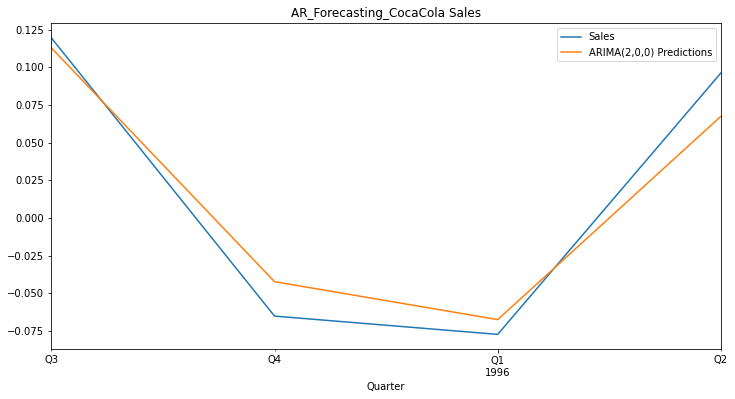

In [163]:
title='AR_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel=''

test_AR['Sales'].plot(legend=True, figsize=(12,6),title=title)
predictions_ar.plot(legend=True)
plt.show()

In [164]:
# Retrain the model on the full data and forecast the future

model=ARIMA(cc_df['Sales'], order=(2,0,0))
results=model.fit()
fcast_ar=results.predict(len(cc_df), len(cc_df)+3, typ='level').rename('ARIMA(2,0,0) Forecast')

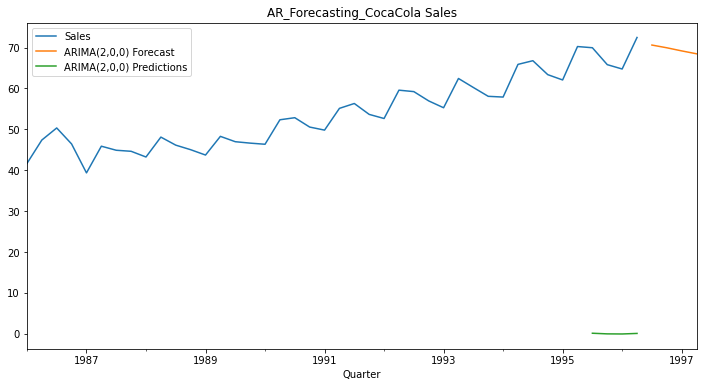

In [165]:
title ='AR_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period'

cc_df['Sales'].plot(legend=True, figsize=(12,6), title=title)
fcast_ar.plot(legend=True)
predictions_ar.plot(legend=True)
plt.show()

## 4 Quarters Forecast Values for AR Model

In [166]:
fcast_ar

1996-07-01    70.622014
1996-10-01    69.954593
1997-01-01    69.191402
1997-04-01    68.482990
Freq: QS-JAN, Name: ARIMA(2,0,0) Forecast, dtype: float64

## MSE and RMSE AR Model

In [167]:
AR = CocaCola.copy()
len(AR)

42

In [168]:
Train_ar=AR.head(38)
Test_ar=AR.tail(4)

In [169]:
mse_ar=mean_squared_error(Test_ar.Sales, predictions_ar)
mse_ar.round(2)

21979669.27

In [170]:
rmse_ar=np.sqrt(mean_squared_error(Test_ar.Sales, predictions_ar)).round(2)
rmse_ar

4688.25

In [171]:
AR={"MODEL":pd.Series(["AR_Model"]),"RMSE":pd.Series([rmse_ar]),"MSE":pd.Series([mse_ar])}
AR=pd.DataFrame(AR)
AR.round(2)

,MODEL,RMSE,MSE
0,AR_Model,4688.25,21979669.27


In [172]:
# MA lag1
model_ma1=ARMA(ts_log_diff1['Sales'], order =(0,1)) #ts_log_diff1
results_ma1=model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 1)   Log Likelihood                  50.004
Method:                       css-mle   S.D. of innovations              0.066
Date:                Wed, 30 Jun 2021   AIC                            -94.007
Time:                        13:40:00   BIC                            -88.941
Sample:                    07-01-1986   HQIC                           -92.175
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0255      0.021      1.233      0.217      -0.015       0.066
ma.L1.Sales     0.9999      0.077     12.941      0.000       0.848       1.151
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [173]:
# MA Lag2
model_ma2=ARMA(ts_log_diff1['Sales'], order =(0,2)) 
results_ma2=model_ma2.fit()
results_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 2)   Log Likelihood                  55.519
Method:                       css-mle   S.D. of innovations              0.058
Date:                Wed, 30 Jun 2021   AIC                           -103.037
Time:                        13:40:17   BIC                            -96.282
Sample:                    07-01-1986   HQIC                          -100.595
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0226      0.004      5.111      0.000       0.014       0.031
ma.L1.Sales     0.2191      0.130      1.679      0.093      -0.037       0.475
ma.L2.Sales    -0.7809      0.124     -6.305      0.000      -1.024      -0.538
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.2806           +0.0000j            1.2806            0.0000
-----------------------------------------------------------------------------
"""

In [174]:
LLR_test(model_ma1, model_ma2)

0.001

In [175]:
# MA lag3
model_ma3=ARMA(ts_log_diff1['Sales'], order =(0,3))
results_ma3=model_ma3.fit()
print(results_ma3.summary())
print ("LLR test: " + str(LLR_test(model_ma2, model_ma3)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 3)   Log Likelihood                  63.178
Method:                       css-mle   S.D. of innovations              0.046
Date:                Wed, 30 Jun 2021   AIC                           -116.355
Time:                        13:41:05   BIC                           -107.911
Sample:                    07-01-1986   HQIC                          -113.302
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0242      0.002     12.031      0.000       0.020       0.028
ma.L1.Sales     0.7236      0.139      5.210      0.000       0.451       0.996
ma.L2.Sales    -0.9362      0.184     -5.094    

In [176]:
# Observation
# q values very high moving to Model2 to Model3, there is no model improvments.
# Model 2 is good values for q.

### Analyse 

In [177]:
ts_log_diff1['res_ret']=results_ar2.resid

In [178]:
ts_log_diff1.res_ret.mean()

0.002647657783699569

In [179]:
ts_log_diff1.res_ret.std()

0.049778498329224416

In [180]:
ts_log_diff1.res_ret.var()

0.0024778988959125977

In [181]:
sts.adfuller(ts_log_diff1.res_ret)

(-3.6774138991430463,
 0.004442300282307293,
 4,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -137.67907792360862)

### ACF of Residuals Returns

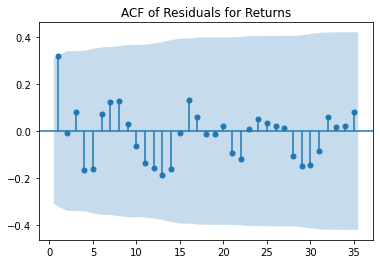

In [182]:
sgt.plot_acf(ts_log_diff1.res_ret,zero=False, lags=35)
plt.title("ACF of Residuals for Returns")
plt.show()

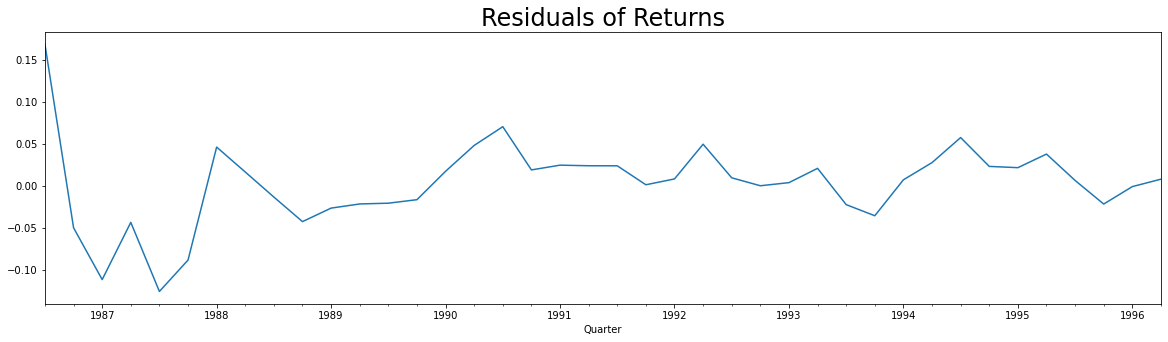

In [183]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

## Building Moving Average

In [184]:
train_ma=ts_log_diff1.iloc[:36]
test_ma=ts_log_diff1.iloc[36:]

In [185]:
model = ARIMA(train_ma['Sales'],order=(0,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(0, 2)   Log Likelihood                  49.378
Method:                       css-mle   S.D. of innovations              0.059
Date:                Wed, 30 Jun 2021   AIC                            -90.756
Time:                        13:43:40   BIC                            -84.422
Sample:                    07-01-1986   HQIC                           -88.546
                         - 04-01-1995                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0223      0.005      4.452      0.000       0.012       0.032
ma.L1.Sales     0.2349      0.140      1.678      0.093      -0.039       0.509
ma.L2.Sales    -0.7651      0.132     -5.793      0.000      -1.024      -0.506
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.3071           +0.0000j            1.3071            0.0000
-----------------------------------------------------------------------------
"""

In [186]:
model_fit=model.fit()
model_fit.params

const          0.022321
ma.L1.Sales    0.234920
ma.L2.Sales   -0.765061
dtype: float64

In [187]:
# Observation-
# constant = 0.005624 . Because we saw in the Stationary time series that the mean was almost close to zero.
# Coefficient =-0.777048
# The MA model has only one lag or p=2. Hence, we can represent the model as AR(2)

## User Model 

In [189]:
start=len(train_ma)
end=len(ts_log_diff1)-1
predictions_ma=results.predict(start=start, end=end, dynamic=False, typ='level')
predictions_ma=predictions_ma.rename('ARIMA(0,0,2) Predictions')

In [190]:
for i in range(len(predictions_ma)):
    print(f"predicted={predictions_ma[i]:<11.10}, expected={test_ma['Sales'][i]}")

predicted=0.05603491771, expected=0.11955135299514996
predicted=-0.02526557523, expected=-0.0651475719226573
predicted=0.02232067927, expected=-0.07727967175137351
predicted=0.02232067927, expected=0.09626959960702663


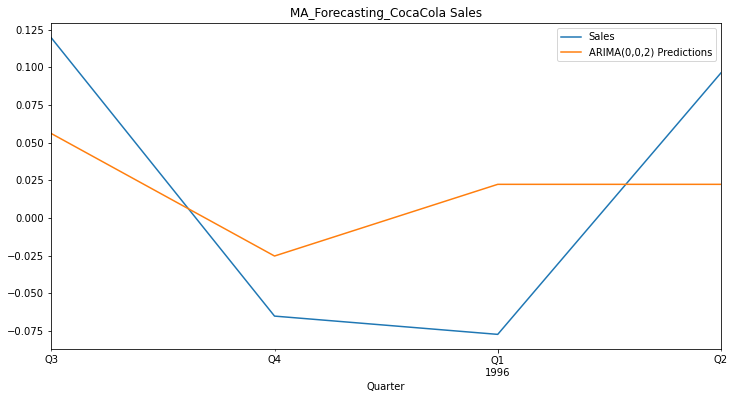

In [191]:
title='MA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel=''

test_ma['Sales'].plot(legend=True, figsize=(12, 6),title=title)
predictions_ma.plot(legend=True)
plt.show()

### Retrain the model on the full data and forecast the future 

In [193]:
model1=ARIMA(cc_df['Sales'], order=(0,0,2))
results1=model1.fit(disp=-1)
fcast_ma=results1.predict(len(cc_df), len(cc_df)+3, typ='levels').rename('ARIMA(0,0,2) Forecast')

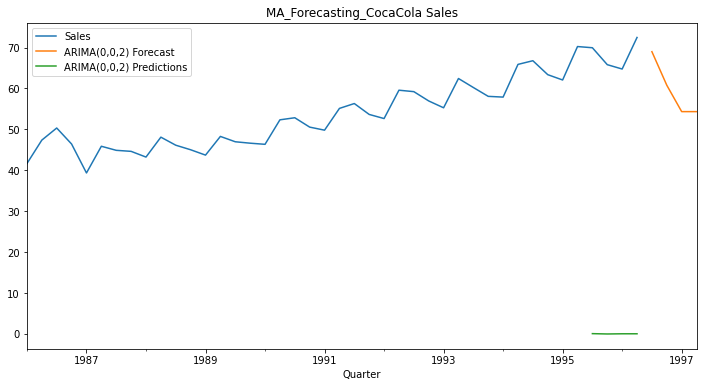

In [194]:
title = 'MA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period' 

cc_df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_ma.plot(legend=True)
predictions_ma.plot(legend=True)
plt.show()

## 4 Quarter Forecast

In [195]:
fcast_ma

1996-07-01    69.000147
1996-10-01    60.800195
1997-01-01    54.344121
1997-04-01    54.344121
Freq: QS-JAN, Name: ARIMA(0,0,2) Forecast, dtype: float64

## MSE & RMSE 

In [196]:
MA = CocaCola.copy()

In [197]:
Train_ma = MA.head(38)
Test_ma = MA.tail(4)

In [198]:
mse_ma = mean_squared_error(Test_ma.Sales, predictions_ma)
mse_ma.round(2)

21979701.91

In [199]:
rmse_ma=np.sqrt(mean_squared_error(Test_ma.Sales, predictions_ma)).round(2)
rmse_ma

4688.25

In [200]:
MA={"MODEL":pd.Series(["MA_Model"]),"RMSE":pd.Series([rmse_ma]),"MSE":pd.Series([mse_ma])}
MA=pd.DataFrame(MA)
MA.round(2)

,MODEL,RMSE,MSE
0,MA_Model,4688.25,21979701.91


In [201]:
# Autoregressive Integrated Moving Averages (ARIMA)
# Recall that an AR(1) model follows the formula
# 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 while an MA(1) model follows the formula
# 𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 where 𝑐 is a constant, 𝜇 is the expectation of 𝑦𝑡 (often assumed to be zero), 𝜙1 is the AR lag coefficient, 𝜃1 (theta-sub-one) is the MA lag coefficient, and 𝜀 (epsilon) is white noise.
# An ARMA(1,1) model therefore follows
# 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡

## Building ARIMA

In [202]:
train_ARIMA=ts_log_diff1.head(36)
test_ARIMA=ts_log_diff1.tail(4)

In [203]:
model=ARIMA(train_ARIMA['Sales'],order=(2,1,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  66.915
Method:                       css-mle   S.D. of innovations              0.032
Date:                Wed, 30 Jun 2021   AIC                           -121.830
Time:                        18:19:23   BIC                           -112.498
Sample:                    10-01-1986   HQIC                          -118.609
                         - 04-01-1995                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0016      0.001      1.463      0.143      -0.001       0.004
ar.L1.D.Sales    -0.0622      0.071     -0.877      0.381      -0.201       0.077
ar.L2.D.Sales    -0.9449      0.049    -19.422      0.000      -1.040      -0.850
ma.L1.D.Sales    -0.1327      0.180     -0.739      0.460      -0.485       0.219
ma.L2.D.Sales    -0.5274      0.193     -2.728      0.006      -0.906      -0.149
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0329           -1.0282j            1.0287           -0.2551
AR.2           -0.0329           +1.0282j            1.0287            0.2551
MA.1            1.2569           +0.0000j            1.2569            0.0000
MA.2           -1.5086           +0.0000j            1.5086            0.5000
-----------------------------------------------------------------------------
"""

In [204]:
model_fit=model.fit()
model_fit.params

const            0.001631
ar.L1.D.Sales   -0.062184
ar.L2.D.Sales   -0.944899
ma.L1.D.Sales   -0.132739
ma.L2.D.Sales   -0.527406
dtype: float64

In [205]:
# Observation-
# constant = 0.000408 . Because we saw in the Stationary time series that the mean was almost close to zero.
# Coefficient = AR=--0.943967 and MA=-0.512689
# The ARIMA model has e lag or 2-1-2. Hence, we can represent the model as ARIMA(2-1-2)

## Use Model to Predict

In [206]:
start=len(train_ARIMA)
end=len(ts_log_diff1)-1
predictions_arima=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_arima=predictions_arima.rename('ARIMA(2,1,2) Predictions')

In [207]:
for i in range(len(predictions_arima)):
    print(f"predicted={predictions_arima[i]:<11.10}, expected={test_ARIMA['Sales'][i]}")

predicted=0.1341368491, expected=0.11955135299514996
predicted=-0.02470531926, expected=-0.0651475719226573
predicted=-0.04096634165, expected=-0.07727967175137351
predicted=0.1134080038, expected=0.09626959960702663


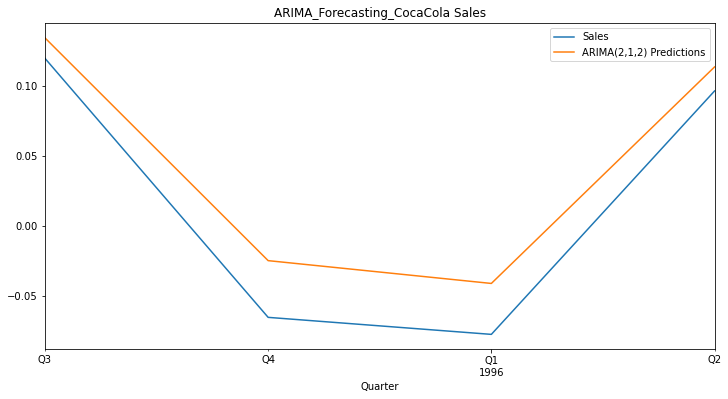

In [208]:
title = 'ARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='' 

test_ARIMA['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
plt.show()

In [209]:
# Retrain the model

model=ARIMA(cc_df['Sales'], order=(2,1,2))
results=model.fit(disp=-1)
fcast_ARIMA=results.predict(len(cc_df), len(cc_df)+3, typ='levels').rename('ARIMA(2,1,2) Forecast')

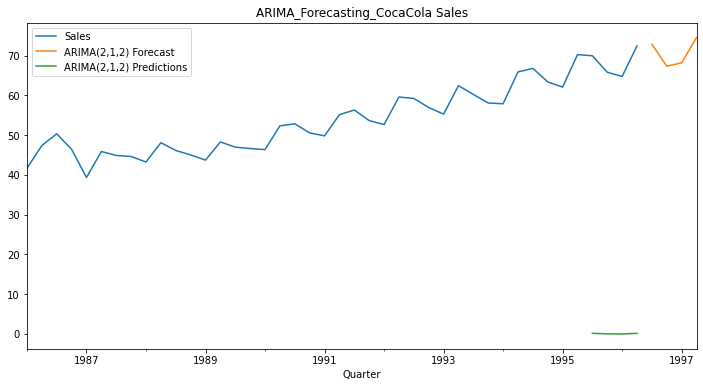

In [210]:
title = 'ARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period' 

cc_df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_ARIMA.plot(legend=True)
predictions_arima.plot(legend=True)
plt.show()

In [211]:
fcast_ARIMA

1996-07-01    72.871631
1996-10-01    67.348063
1997-01-01    68.185351
1997-04-01    74.572066
Freq: QS-JAN, Name: ARIMA(2,1,2) Forecast, dtype: float64

## Evaluate

In [212]:
ARIMA = CocaCola.copy()

In [213]:
Train_arima=ARIMA.head(38)
Test_arima=ARIMA.tail(4)

In [214]:
mse_arima=mean_squared_error(Test_arima, fcast_ARIMA)
mse_arima.round(2)

21321792.71

In [215]:
rmse_arima=np.sqrt(mean_squared_error(Test_arima, predictions_arima)).round(2)
rmse_arima

4688.22

In [216]:
ARIMA={"MODEL":pd.Series(["ARIMA_Model"]),"RMSE":pd.Series([rmse_arima]),"MSE":pd.Series([mse_arima])}
ARIMA=pd.DataFrame(ARIMA)
ARIMA.round(2)

,MODEL,RMSE,MSE
0,ARIMA_Model,4688.22,21321792.71


## SARIMA

In [217]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [218]:
sarima = CocaCola.copy()

In [219]:
train_sm=sarima.head(38)
test_sm=sarima.tail(4)

In [220]:
model2=SARIMAX(train_sm['Sales'], order=(2,1,2), seasonal_order=(2,1,2,4))
results2=model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   38
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 4)   Log Likelihood                -213.778
Date:                           Wed, 30 Jun 2021   AIC                            445.557
Time:                                   18:23:45   BIC                            459.025
Sample:                               01-01-1986   HQIC                           450.088
                                    - 04-01-1995                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2558      0.442      2.840      0.005       0.389       2.122
ar.L2         -0.7522      0.410     -1.833      0.067      -1.557       0.052
ma.L1         -1.6353      1.812     -0.902      0.367      -5.187       1.916
ma.L2          0.9822      2.144      0.458      0.647      -3.219       5.183
ar.S.L4       -0.0017      1.003     -0.002      0.999      -1.968       1.964
ar.S.L8        0.9983      1.019      0.980      0.327      -0.999       2.996
ma.S.L4       -0.0007      0.430     -0.002      0.999      -0.843       0.841
ma.S.L8       -0.9980      2.794     -0.357      0.721      -6.474       4.478
sigma2      2.019e+04      0.000   9.49e+07      0.000    2.02e+04    2.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.69   Prob(JB):                         0.74
Heteroskedasticity (H):               0.55   Skew:                            -0.11
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+24. Standard errors may be unstable.
"""

In [221]:
model_fit1 = model2.fit()
model_fit1.params

ar.L1          1.255830
ar.L2         -0.752241
ma.L1         -1.635337
ma.L2          0.982220
ar.S.L4       -0.001705
ar.S.L8        0.998288
ma.S.L4       -0.000683
ma.S.L8       -0.998026
sigma2     20189.369345
dtype: float64

## Use Model  to Predict

In [222]:
start=len(train_sm)
end=len(sarima)-1
predictions1=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions1=predictions1.rename('SARIMA(2,1,2) Predictions')

In [223]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test_sm['Sales'][i]}")

predicted=70.29586561, expected=4895.0
predicted=64.62472744, expected=4333.0
predicted=66.59397315, expected=4194.0
predicted=71.37907243, expected=5253.0


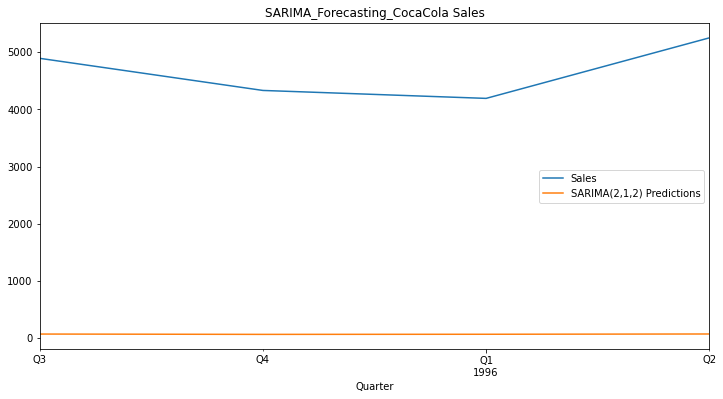

In [224]:
title = 'SARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='' 

test_sm['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions1.plot(legend=True)
plt.show()

In [225]:
model3=SARIMAX(sarima['Sales'], order=(2,1,2))
results3=model3.fit()
fcast_sarima=results3.predict(len(sarima), len(sarima)+3, typ='levels').rename('SARIMA(2,1,2) Forecast')

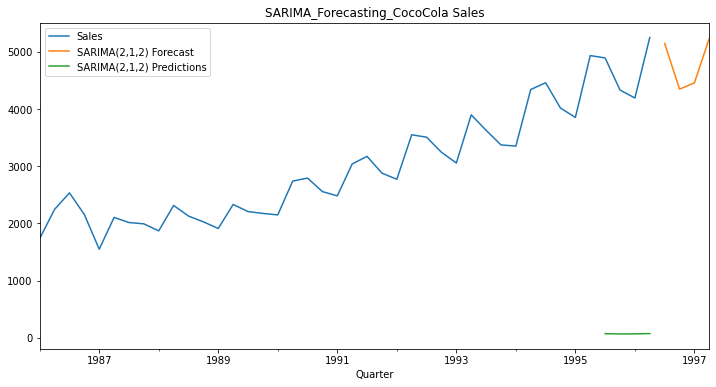

In [226]:
title = 'SARIMA_Forecasting_CocoCola Sales'
ylabel='Sales'
xlabel='Period' 

sarima['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_sarima.plot(legend=True)
predictions1.plot(legend=True)
plt.show()

In [227]:
# We are able to capture trend and seasonality both

In [228]:
fcast_sarima

1996-07-01    5148.744064
1996-10-01    4348.433034
1997-01-01    4458.980077
1997-04-01    5238.820735
Freq: QS-JAN, Name: SARIMA(2,1,2) Forecast, dtype: float64

 ## Evaluate Model

In [229]:
mse_sm=mean_squared_error(test_sm.Sales, fcast_sarima)
mse_sm.round(2)

33759.93

In [230]:
rmse_sm=np.sqrt(mean_squared_error(test_sm.Sales, fcast_sarima))
rmse_sm.round(2)

183.74

In [231]:
SARIMA={"MODEL":pd.Series(["SARIMA_Model"]),"RMSE":pd.Series([rmse_sm]),"MSE":pd.Series([mse_sm])}
SARIMA=pd.DataFrame(SARIMA)
SARIMA.round(2)

,MODEL,RMSE,MSE
0,SARIMA_Model,183.74,33759.93


In [235]:
Results={"MODEL":pd.Series(["Naive","Exponentially Weighted Moving Average","Single Exponeatail Smoothing","Double Exponential Smoothing","Holt Winters Method_Additive","Holt Winters Method_Multiplicative","Auto Regressive (AR)","Moving average (MA)","ARIMA",'SARIMA']),"RMSE":pd.Series([rmse_naive,rmse_ewma,rmse_ses,rmse_des,rmse_hwm_add,rmse_hwm_mul,rmse_ar,rmse_ma,rmse_arima,rmse_sm])} #"MSE":pd.Series([mse_naive,mse_ap_ma,mse_ewma,mse_ses,mse_des,mse_hwm_add,mse_hwm_mul,mse_ar,mse_ma,mse_arima,mse_sm])}
Results=pd.DataFrame(Results)
Results.round(2)

,MODEL,RMSE
0,Naive,504.07
1,Exponentially Weighted Moving Average,504.07
2,Single Exponeatail Smoothing,776.48
3,Double Exponential Smoothing,462.57
4,Holt Winters Method_Additive,199.80
5,Holt Winters Method_Multiplicative,140.15
6,Auto Regressive (AR),4688.25
7,Moving average (MA),4688.25
8,ARIMA,4688.22
9,SARIMA,183.74


In [236]:
# Interpretation
# The best model we have got so far with the lowest RMSE